# Superhero SQL Mystery Project

## Loading and Inspecting the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3 

pd.options.display.max_columns=200  # To visualize the 200 many the columns in data

import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls CSVs

heroes_information.csv
places.csv
sidekicks.csv
super_hero_powers.csv
villains.csv


In [3]:
hero_info = pd.read_csv('CSVs/heroes_information.csv', index_col=[0])
hero_powers = pd.read_csv('CSVs/super_hero_powers.csv')
villains = pd.read_csv('CSVs/villains.csv', index_col=[0])
sidekicks = pd.read_csv('CSVs/sidekicks.csv', index_col=[0])
places = pd.read_csv('CSVs/places.csv', index_col=[0])

In [4]:
# Look into hero_info dataset:
hero_info

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [5]:
# Look into hero_powers dataset:
hero_powers

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [6]:
# Look into villains dataset:
villains

,name,real names,aliases,gender,charecter type,powers
0,Magneto,Max Eisenhardt,"Erik Magnus Lehnsherr, The Master of Magnetism...",Male,Mutant,"Blast Power, Electricity Control, Electronic D..."
1,Joker,Unknown,"""Clown Prince of Crime , Harlequin of Hate, Pu...",Male,Other,"Adaptive, Agility, Chameleon, Enhance Mutation..."
2,Doctor Doom,Victor Von Doom,"Dr. Doom, Victor von Doom, The Master, The Bar...",Male,Human,"Adaptive, Agility, Blast Power, Electricity Co..."
3,Lex Luthor,Alexander Joseph Luthor,"Alexander Joseph Luthor, Alexander Luthor, Ale...",Male,Human,"Blast Power, Energy Manipulation, Energy Shiel..."
4,Galactus,Galan,"Galan, Galen, Devourer of Worlds, Ravager of P...",Male,God/Eternal,"Astral Projection, Berserker Strength, Blast P..."
...,...,...,...,...,...,...
94,Despero,Despero,"Despero the Reborn, Destroyer of Worlds",Male,Alien,"Astral Projection, Blast Power, Claws, Energy ..."
95,Violator,Violator,"Clown, Violator, Heart Surgeon",Male,God/Eternal,"Agility, Berserker Strength, Claws, Cosmic Awa..."
96,Mastermind,Jason Wyngarde,"Jason Wyngarde, Nikos, The Great Illusionist, ...",Male,Mutant,"Chameleon, Illusion Casting, Mesmerize, Telepa..."
97,Fin Fang Foom,Fin Fang Foom,"He Whose Limbs Shatter Mountains, and Whose Ba...",Male,Alien,"Berserker Strength, Blast Power, Chemical Secr..."


In [7]:
# Look into sidekicks dataset:
sidekicks

,Sidekicks,Aliases,Heroes
0,Aquagirl,Tula,Aquaman
1,Aquagirl II,Lorena Marquez,Aquaman
2,Aqualad,Garth,Aquaman
3,Aqualad II,Jackson Hyde,Aquaman
4,Bat-Girl,"Mary Elizabeth ""Bette"" Kane",Batwoman
...,...,...,...
60,Jim Rhodes,James Rupert Rhodes,Iron Man
61,Sun Girl,Mary Mitchell,Human Torch (android)
62,Toro,Thomas Raymond,Human Torch (android)
63,Jim Wilson,N.A.,Hulk


In [8]:
# Look into places dataset:
places

,location,description
0,Gotham City,Gotham City is under the protection of Batman ...
1,Krypton,A fictional planet in the DC Universe and the ...
2,Batcave,The Batcave is the secret headquarters for Bat...
3,Arkham Asylum,Arkham Asylum for the Criminally Insane is a f...
4,Castle Grayskull,At the center of the Universe; between light a...
5,Genosha,An island nation off the east coast of Africa....
6,Wakanda,Wakanda is an African nation in the Marvel uni...
7,Atlantis,Atlantis was a myth described by Plato as an a...
8,Latveria,An Eastern European country ruled by Victor Vo...
9,Iron Heights,A maximum security prison for metahuman crimin...


In [9]:
places_cols = places.columns
hero_p_cols = hero_powers.columns
villains_cols = villains.columns
sidekicks_cols = sidekicks.columns
places_cols = places.columns

all_cols = places_cols, hero_p_cols, villains_cols, sidekicks_cols, places_cols

## Exploratory Data Analysis, Data Cleaning, and SQL Database Creation

### 1. `hero_info` Dataset

In [10]:
hero_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [11]:
# Missing value counts:
hero_info.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [12]:
# Look into value counts of each column:
for c in hero_info.columns:
    print('Column: ', c)
    print(hero_info[c].value_counts(dropna=False))
    print('*'*30)
    print('\n')

Column:  name
Goliath         3
Spider-Man      3
Black Canary    2
Blue Beetle     2
Namor           2
               ..
Master Chief    1
Battlestar      1
Legion          1
Steel           1
Ultron          1
Name: name, Length: 715, dtype: int64
******************************


Column:  Gender
Male      505
Female    200
-          29
Name: Gender, dtype: int64
******************************


Column:  Eye color
blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
blue / white                 1
yellow / red                 1
yellow / blue                1
white / red           

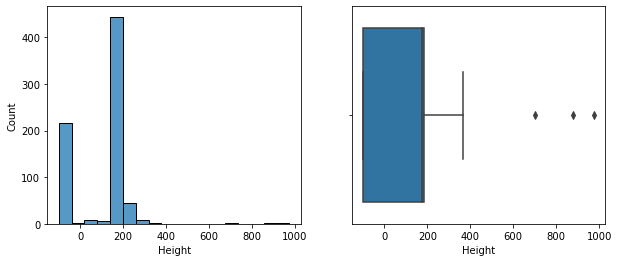

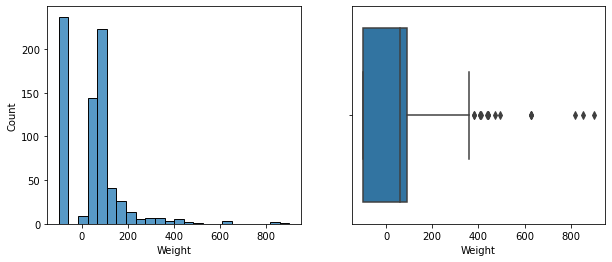

In [13]:
# Visualizing numerical column distributions and corresponding boxplots:
numerical = hero_info.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=hero_info, x=col, ax=ax[0])
    sns.boxplot(data=hero_info, x=col, ax=ax[1]);

In [14]:
# Filling missing publisher values with 'Unknown'
hero_info['Publisher'].fillna(value='Unknown', inplace=True)

In [15]:
hero_info.replace(to_replace = '-', value = 'Unknown', inplace = True)

In [16]:
# Weight column:
hero_info['Weight'].value_counts(dropna=False).sort_index(0)

-99.0     237
 2.0        1
 4.0        1
 14.0       1
 16.0       1
         ... 
 630.0      3
 817.0      1
 855.0      1
 900.0      1
 NaN        2
Name: Weight, Length: 136, dtype: int64

In [17]:
# Replace missing weight and '-99.0' weight values with the minimum weight in the dtaaset, which is '2.0':
hero_info['Weight'].fillna(value = 2.0, inplace=True)
hero_info['Weight'].replace(to_replace = -99.0, value = 2.0, inplace = True)

In [18]:
# Height column:
hero_info['Height'].value_counts(dropna=False).sort_index(0)

-99.0     217
 15.2       1
 30.5       2
 61.0       1
 62.5       1
 64.0       1
 66.0       1
 71.0       1
 79.0       1
 108.0      1
 122.0      2
 137.0      2
 140.0      1
 142.0      1
 155.0      3
 157.0      5
 160.0      1
 163.0      8
 165.0     26
 168.0     29
 170.0     26
 173.0     17
 175.0     34
 178.0     39
 180.0     38
 183.0     59
 185.0     35
 188.0     51
 191.0     21
 193.0     21
 196.0     11
 198.0     18
 201.0     11
 203.0      5
 206.0      2
 211.0      5
 213.0      7
 218.0      3
 226.0      3
 229.0      3
 234.0      1
 244.0      4
 257.0      1
 259.0      1
 267.0      1
 279.0      2
 287.0      1
 297.0      1
 304.8      1
 305.0      2
 366.0      2
 701.0      1
 876.0      1
 975.0      1
Name: Height, dtype: int64

In [19]:
# Replace '-99.0' height values with the minimum height in the dtaaset, which is '15.2':
hero_info['Height'].replace(to_replace = -99.0, value = 15.2, inplace = True)

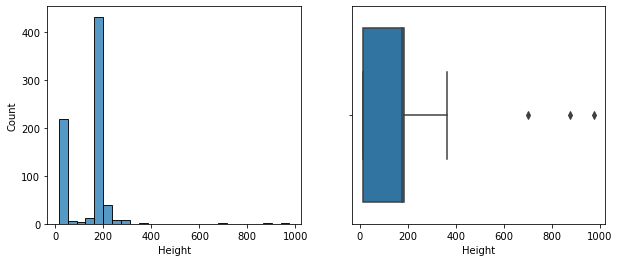

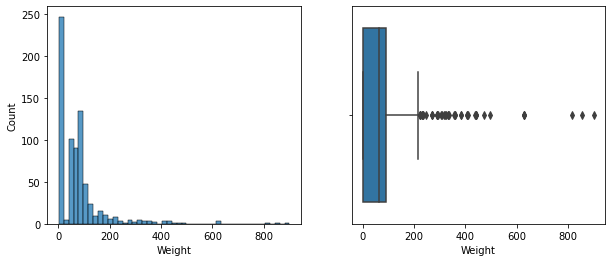

In [20]:
# Visualizing numerical column distributions and corresponding boxplots: 
# No negative weights and heights:
numerical = hero_info.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=hero_info, x=col, ax=ax[0])
    sns.boxplot(data=hero_info, x=col, ax=ax[1]);

In [21]:
# No missing values
hero_info.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [22]:
# Look into value counts of each column:
for c in hero_info.columns:
    print('Column: ', c)
    print(hero_info[c].value_counts(dropna=False))
    print('*'*30)
    print('\n')

Column:  name
Goliath         3
Spider-Man      3
Black Canary    2
Blue Beetle     2
Namor           2
               ..
Master Chief    1
Battlestar      1
Legion          1
Steel           1
Ultron          1
Name: name, Length: 715, dtype: int64
******************************


Column:  Gender
Male       505
Female     200
Unknown     29
Name: Gender, dtype: int64
******************************


Column:  Eye color
blue                       225
Unknown                    172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
blue / white                 1
yellow / blue                1
yellow / red                 1
bown               

#### Create `HEROES` Database from `hero_info` Dataset

In [23]:
conn = sqlite3.connect('data.sqlite')
cur = conn.cursor()

In [24]:
# this creates table
cur.execute("""DROP TABLE IF EXISTS HEROES;""")
cur.execute("""CREATE TABLE HEROES (
                                       hero_id INTEGER PRIMARY KEY,
                                       name TEXT,
                                       gender TEXT,
                                       eye_color TEXT,
                                       race TEXT,
                                       hair_color TEXT,
                                       height TEXT,
                                       publisher TEXT,
                                       skin_color TEXT,
                                       alignment TEXT,
                                       weight TEXT
                                       );
""")

In [25]:
hero_info

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,15.2,Marvel Comics,Unknown,bad,2.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,2.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0


In [26]:
# Iterate over the hero_info pandas df and populate the HEROES database table:
error_lines = []
for i in hero_info.index:
    try:
        hero_id = i
        name = hero_info['name'][i]
        gender = hero_info['Gender'][i]
        eye_color = hero_info['Eye color'][i]
        race = hero_info['Race'][i]
        hair_color = hero_info['Hair color'][i]
        height = hero_info['Height'][i]
        publisher = hero_info['Publisher'][i]
        skin_color = hero_info['Skin color'][i]
        alignment = hero_info['Alignment'][i]
        weight = hero_info['Weight'][i]

        cur.execute("""INSERT INTO HEROES (hero_id,
                                              name, 
                                              gender, 
                                              eye_color, 
                                              race, 
                                              hair_color, 
                                              height, 
                                              publisher,
                                              skin_color,
                                              alignment,
                                              weight)
                    VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');
                """.format(hero_id, name, gender, eye_color, race, hair_color, height, publisher, skin_color, alignment, weight))
    except:
        error_lines.append(i)

In [27]:
cur.execute("""SELECT * FROM HEROES;""")
df=pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,hero_id,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,15.2,Marvel Comics,Unknown,bad,2.0
...,...,...,...,...,...,...,...,...,...,...,...
727,728,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,Unknown,good,83.0
728,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0
729,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,2.0
730,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0


In [28]:
error_lines

[540, 731]

In [29]:
hero_info.iloc[error_lines, :]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
540,Ra's Al Ghul,Male,green,Human,Grey,193.0,DC Comics,Unknown,bad,97.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0


In [30]:
# The strings containing `'` inside of the words like "Ra's Al Ghul" and "Yoda's species" generates the error!
# We will rename those as "Ras Al Ghul" and "Yoda species" to overcome this problem:
hero_info.replace(to_replace = "Ra's Al Ghul", value = 'Ras Al Ghul', inplace = True)
hero_info.replace(to_replace = "Yoda's species", value = 'Yoda species', inplace = True)

In [31]:
# this creates table
cur.execute("""DROP TABLE IF EXISTS HEROES;""")
cur.execute("""CREATE TABLE HEROES (
                                       hero_id INTEGER PRIMARY KEY,
                                       name TEXT,
                                       gender TEXT,
                                       eye_color TEXT,
                                       race TEXT,
                                       hair_color TEXT,
                                       height TEXT,
                                       publisher TEXT,
                                       skin_color TEXT,
                                       alignment TEXT,
                                       weight TEXT
                                       );
""")

In [32]:
# Now reiterate over the hire_info pandas df and populate the HEROES database table:
error_lines = []
for i in hero_info.index:
    try:
        hero_id = i
        name = hero_info['name'][i]
        gender = hero_info['Gender'][i]
        eye_color = hero_info['Eye color'][i]
        race = hero_info['Race'][i]
        hair_color = hero_info['Hair color'][i]
        height = hero_info['Height'][i]
        publisher = hero_info['Publisher'][i]
        skin_color = hero_info['Skin color'][i]
        alignment = hero_info['Alignment'][i]
        weight = hero_info['Weight'][i]

        cur.execute("""INSERT INTO HEROES (hero_id,
                                              name, 
                                              gender, 
                                              eye_color, 
                                              race, 
                                              hair_color, 
                                              height, 
                                              publisher,
                                              skin_color,
                                              alignment,
                                              weight)
                    VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}');
                """.format(hero_id, name, gender, eye_color, race, hair_color, height, publisher, skin_color, alignment, weight))
    except:
        error_lines.append(i)

In [33]:
# No error lines!!!
error_lines

[]

In [34]:
# We have all heroes_info from pandas df converted into HEROES database table: 
cur.execute("""SELECT * FROM HEROES;""")
df=pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,hero_id,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,15.2,Marvel Comics,Unknown,bad,2.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,2.0
731,731,Yoda,Male,brown,Yoda species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0


### 2. `hero_powers` Dataset

In [35]:
hero_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [36]:
# Missing value counts:
hero_powers.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

No missing value exists! This dataset has boolean values for all of the columns.

In [37]:
hero_powers

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [38]:
hero_powers.to_sql("POWERS", conn, if_exists="replace", index_label = 'power_id')

In [39]:
# We have all hero_powers from pandas df converted into POWERS database table: 
cur.execute("""SELECT * FROM POWERS;""")
df = pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,power_id,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,3-D Man,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,A-Bomb,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Abe Sapien,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Abin Sur,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Abomination,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

### 3. `villains` Dataset

In [40]:
villains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            93 non-null     object
 1   real names      89 non-null     object
 2   aliases         93 non-null     object
 3   gender          93 non-null     object
 4   charecter type  93 non-null     object
 5   powers          93 non-null     object
dtypes: object(6)
memory usage: 5.4+ KB


In [41]:
# Missing value counts:
villains.isna().sum()

name               6
real names        10
aliases            6
gender             6
charecter type     6
powers             6
dtype: int64

In [42]:
# Look into value counts of each column:
for c in villains.columns:
    print('Column: ', c)
    print(villains[c].value_counts(dropna=False))
    print('*'*30)
    print('\n')

Column:  name
NaN              6
General Zod      1
Violator         1
Anti-Monitor     1
Two-Face         1
                ..
Kang             1
Penguin          1
Eobard Thawne    1
Proteus          1
Metallo          1
Name: name, Length: 94, dtype: int64
******************************


Column:  real names
NaN                       10
Unknown                    4
Rudolph C. Jones           1
Curtis Connors             1
Dru-Zod                    1
                          ..
Amanda Blake Waller        1
Adrian Alexander Veidt     1
Kevin MacTaggert           1
Khan                       1
Grodd                      1
Name: real names, Length: 87, dtype: int64
******************************


Column:  aliases
NaN                                                                                                                                                                                                                                                6
The Inventor, The Cyborg, High

In [43]:
villains

,name,real names,aliases,gender,charecter type,powers
0,Magneto,Max Eisenhardt,"Erik Magnus Lehnsherr, The Master of Magnetism...",Male,Mutant,"Blast Power, Electricity Control, Electronic D..."
1,Joker,Unknown,"""Clown Prince of Crime , Harlequin of Hate, Pu...",Male,Other,"Adaptive, Agility, Chameleon, Enhance Mutation..."
2,Doctor Doom,Victor Von Doom,"Dr. Doom, Victor von Doom, The Master, The Bar...",Male,Human,"Adaptive, Agility, Blast Power, Electricity Co..."
3,Lex Luthor,Alexander Joseph Luthor,"Alexander Joseph Luthor, Alexander Luthor, Ale...",Male,Human,"Blast Power, Energy Manipulation, Energy Shiel..."
4,Galactus,Galan,"Galan, Galen, Devourer of Worlds, Ravager of P...",Male,God/Eternal,"Astral Projection, Berserker Strength, Blast P..."
...,...,...,...,...,...,...
94,Despero,Despero,"Despero the Reborn, Destroyer of Worlds",Male,Alien,"Astral Projection, Blast Power, Claws, Energy ..."
95,Violator,Violator,"Clown, Violator, Heart Surgeon",Male,God/Eternal,"Agility, Berserker Strength, Claws, Cosmic Awa..."
96,Mastermind,Jason Wyngarde,"Jason Wyngarde, Nikos, The Great Illusionist, ...",Male,Mutant,"Chameleon, Illusion Casting, Mesmerize, Telepa..."
97,Fin Fang Foom,Fin Fang Foom,"He Whose Limbs Shatter Mountains, and Whose Ba...",Male,Alien,"Berserker Strength, Blast Power, Chemical Secr..."


In [44]:
villains['name'].value_counts(dropna=False)

NaN              6
General Zod      1
Violator         1
Anti-Monitor     1
Two-Face         1
                ..
Kang             1
Penguin          1
Eobard Thawne    1
Proteus          1
Metallo          1
Name: name, Length: 94, dtype: int64

In [45]:
villains[villains['name'].isnull()]

,name,real names,aliases,gender,charecter type,powers
25,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
villains.dropna(inplace=True)

In [47]:
villains.isna().sum()

name              0
real names        0
aliases           0
gender            0
charecter type    0
powers            0
dtype: int64

In [48]:
# Look into value counts of each column:
for c in villains.columns:
    print('Column: ', c)
    print(villains[c].value_counts(dropna=False))
    print('*'*30)
    print('\n')

Column:  name
Mandarin                     1
Lady Deathstrike             1
Two-Face                     1
Mirror Master (McCulloch)    1
Annihilus                    1
                            ..
Kang                         1
Penguin                      1
Eobard Thawne                1
Proteus                      1
Amanda Waller                1
Name: name, Length: 89, dtype: int64
******************************


Column:  real names
Unknown                    4
Maxwell Dillon             1
Otto Gunther Octavius      1
Dru-Zod                    1
Mobius                     1
                          ..
Amanda Blake Waller        1
Adrian Alexander Veidt     1
Kevin MacTaggert           1
Khan                       1
Alexander Joseph Luthor    1
Name: real names, Length: 86, dtype: int64
******************************


Column:  aliases
Mephistopheles, The Devil, The Lord Of Lies, Avarrish, Mr. Church, Lord of Evil, Prince of Devils, Satan, Beelzebub, The Friend, Lucifer, Maya,

In [49]:
# Convert pandas to sql database table:
villains.to_sql("VILLAINS", conn, if_exists="replace", index_label = 'villain_id')

In [50]:
# Look into VILLAINS database table: 
cur.execute("""SELECT * FROM VILLAINS;""")
df = pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,villain_id,name,real names,aliases,gender,charecter type,powers
0,0,Magneto,Max Eisenhardt,"Erik Magnus Lehnsherr, The Master of Magnetism...",Male,Mutant,"Blast Power, Electricity Control, Electronic D..."
1,1,Joker,Unknown,"""Clown Prince of Crime , Harlequin of Hate, Pu...",Male,Other,"Adaptive, Agility, Chameleon, Enhance Mutation..."
2,2,Doctor Doom,Victor Von Doom,"Dr. Doom, Victor von Doom, The Master, The Bar...",Male,Human,"Adaptive, Agility, Blast Power, Electricity Co..."
3,3,Lex Luthor,Alexander Joseph Luthor,"Alexander Joseph Luthor, Alexander Luthor, Ale...",Male,Human,"Blast Power, Energy Manipulation, Energy Shiel..."
4,4,Galactus,Galan,"Galan, Galen, Devourer of Worlds, Ravager of P...",Male,God/Eternal,"Astral Projection, Berserker Strength, Blast P..."
...,...,...,...,...,...,...,...
84,94,Despero,Despero,"Despero the Reborn, Destroyer of Worlds",Male,Alien,"Astral Projection, Blast Power, Claws, Energy ..."
85,95,Violator,Violator,"Clown, Violator, Heart Surgeon",Male,God/Eternal,"Agility, Berserker Strength, Claws, Cosmic Awa..."
86,96,Mastermind,Jason Wyngarde,"Jason Wyngarde, Nikos, The Great Illusionist, ...",Male,Mutant,"Chameleon, Illusion Casting, Mesmerize, Telepa..."
87,97,Fin Fang Foom,Fin Fang Foom,"He Whose Limbs Shatter Mountains, and Whose Ba...",Male,Alien,"Berserker Strength, Blast Power, Chemical Secr..."


### 4. `sidekicks` Dataset

In [51]:
sidekicks

,Sidekicks,Aliases,Heroes
0,Aquagirl,Tula,Aquaman
1,Aquagirl II,Lorena Marquez,Aquaman
2,Aqualad,Garth,Aquaman
3,Aqualad II,Jackson Hyde,Aquaman
4,Bat-Girl,"Mary Elizabeth ""Bette"" Kane",Batwoman
...,...,...,...
60,Jim Rhodes,James Rupert Rhodes,Iron Man
61,Sun Girl,Mary Mitchell,Human Torch (android)
62,Toro,Thomas Raymond,Human Torch (android)
63,Jim Wilson,N.A.,Hulk


In [52]:
sidekicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sidekicks  65 non-null     object
 1   Aliases    65 non-null     object
 2   Heroes     65 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [53]:
sidekicks.isna().sum()

Sidekicks    0
Aliases      0
Heroes       0
dtype: int64

In [54]:
# Look into value counts of each column:
for c in sidekicks.columns:
    print('Column: ', c)
    print(sidekicks[c].value_counts(dropna=False))
    print('*'*30)
    print('\n')

Column:  Sidekicks
Robin III         2
Wong              1
Alpha             1
Stripesy          1
Newsboy Legion    1
                 ..
Doiby Dickles     1
Kid Flash         1
Sun Girl          1
Uncle Marvel      1
Robin             1
Name: Sidekicks, Length: 64, dtype: int64
******************************


Column:  Aliases
Dick Grayson                           2
Jason Todd                             1
James Bartholomew Olsen                1
Patrick "Pat" Dugan                    1
Percy Sheldrake                        1
                                      ..
Carrie Kelley                          1
Kon-El                                 1
Cassandra Cain                         1
Timothy Aloysius Cadwallander Dugan    1
Mary Mitchell                          1
Name: Aliases, Length: 64, dtype: int64
******************************


Column:  Heroes
Batman                        11
Aquaman                        4
Superman                       4
Captain America               

In [55]:
# Convert pandas to sql database table:
sidekicks.to_sql("SIDEKICKS", conn, if_exists="replace", index=False)

In [56]:
# Look into SIDEKICKS database table: 
cur.execute("""SELECT * FROM SIDEKICKS;""")
df = pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,Sidekicks,Aliases,Heroes
0,Aquagirl,Tula,Aquaman
1,Aquagirl II,Lorena Marquez,Aquaman
2,Aqualad,Garth,Aquaman
3,Aqualad II,Jackson Hyde,Aquaman
4,Bat-Girl,"Mary Elizabeth ""Bette"" Kane",Batwoman
...,...,...,...
60,Jim Rhodes,James Rupert Rhodes,Iron Man
61,Sun Girl,Mary Mitchell,Human Torch (android)
62,Toro,Thomas Raymond,Human Torch (android)
63,Jim Wilson,N.A.,Hulk


### 5. `places` Dataset

In [57]:
places

,location,description
0,Gotham City,Gotham City is under the protection of Batman ...
1,Krypton,A fictional planet in the DC Universe and the ...
2,Batcave,The Batcave is the secret headquarters for Bat...
3,Arkham Asylum,Arkham Asylum for the Criminally Insane is a f...
4,Castle Grayskull,At the center of the Universe; between light a...
5,Genosha,An island nation off the east coast of Africa....
6,Wakanda,Wakanda is an African nation in the Marvel uni...
7,Atlantis,Atlantis was a myth described by Plato as an a...
8,Latveria,An Eastern European country ruled by Victor Vo...
9,Iron Heights,A maximum security prison for metahuman crimin...


In [58]:
# Convert pandas to sql database table:
places.to_sql("PLACES", conn, if_exists="replace", index=False)

In [59]:
# Look into PLACES database table: 
cur.execute("""SELECT * FROM PLACES;""")
df = pd.DataFrame(cur.fetchall())
df.columns= [x[0] for x in cur.description]
df

,location,description
0,Gotham City,Gotham City is under the protection of Batman ...
1,Krypton,A fictional planet in the DC Universe and the ...
2,Batcave,The Batcave is the secret headquarters for Bat...
3,Arkham Asylum,Arkham Asylum for the Criminally Insane is a f...
4,Castle Grayskull,At the center of the Universe; between light a...
5,Genosha,An island nation off the east coast of Africa....
6,Wakanda,Wakanda is an African nation in the Marvel uni...
7,Atlantis,Atlantis was a myth described by Plato as an a...
8,Latveria,An Eastern European country ruled by Victor Vo...
9,Iron Heights,A maximum security prison for metahuman crimin...
